#### Importing all the relevant packages

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

#### Loading, scaling and splitting the dataset

In [3]:
mall = pd.read_csv('Dataset/Mall_Customers_processed.csv')
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [5]:
# Scaling the data
scaler = StandardScaler()
mall_scaled = scaler.fit_transform(mall.drop(columns=['Gender']))

mall_scaled = np.column_stack((mall[['Gender']], mall_scaled))
mall_scaled

array([[ 0.        , -1.42456879, -1.73899919, -0.43480148],
       [ 0.        , -1.28103541, -1.73899919,  1.19570407],
       [ 1.        , -1.3528021 , -1.70082976, -1.71591298],
       [ 1.        , -1.13750203, -1.70082976,  1.04041783],
       [ 1.        , -0.56336851, -1.66266033, -0.39597992],
       [ 1.        , -1.20926872, -1.66266033,  1.00159627],
       [ 1.        , -0.27630176, -1.62449091, -1.71591298],
       [ 1.        , -1.13750203, -1.62449091,  1.70038436],
       [ 0.        ,  1.80493225, -1.58632148, -1.83237767],
       [ 1.        , -0.6351352 , -1.58632148,  0.84631002],
       [ 0.        ,  2.02023231, -1.58632148, -1.4053405 ],
       [ 1.        , -0.27630176, -1.58632148,  1.89449216],
       [ 1.        ,  1.37433211, -1.54815205, -1.36651894],
       [ 1.        , -1.06573534, -1.54815205,  1.04041783],
       [ 0.        , -0.13276838, -1.54815205, -1.44416206],
       [ 0.        , -1.20926872, -1.54815205,  1.11806095],
       [ 1.        , -0.

### Training the Kmeans model

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

Text(0, 0.5, 'WCSS')

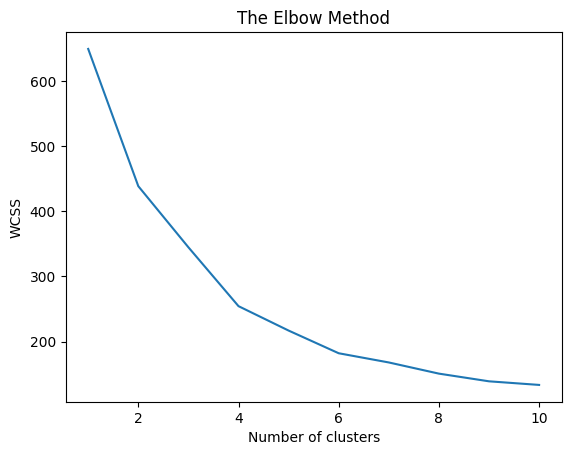

In [7]:
# Determining the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(mall_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [34]:
silhouette_scores = [] # holds the silhouette scores for each k
K = range(2, 10) # change the range as needed
max_iters = [100, 200, 300, 400, 500]
init=['k-means++', 'random']
n_init = list(range(10, 30))
print(n_init)

for k in K:
    for max_iter in max_iters:
        for nit in init:
            for n_ in n_init:
                kmeans = KMeans(n_clusters=k, init=nit, n_init=n_, max_iter=max_iter, random_state=42)
                kmeans.fit(mall_scaled)
                score = silhouette_score(mall_scaled, kmeans.labels_)
                silhouette_scores.append((k, max_iter, nit, n_, score))


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [37]:
best_params = max(silhouette_scores, key=lambda x: x[4])

print(f"Best parameters are: k={best_params[0]}, max_iter={best_params[1]}, init={best_params[2]}, n_init={best_params[3]}, with silhouette score of {best_params[4]}")

Best parameters are: k=6, max_iter=100, init=k-means++, n_init=10, with silhouette score of 0.356485834425401


In [40]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans.fit(mall_scaled)

clusters = kmeans.predict(mall_scaled)

In [41]:
mall['cluster'] = clusters

In [42]:
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,4
1,0,21,15,81,4
2,1,20,16,6,2
3,1,23,16,77,4
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,3
197,0,32,126,74,1
198,0,32,137,18,3


In [45]:
mall[mall['cluster'] == 3]

# This shows that people of Annual Income less than 40 often have low spending score and hence belong to cluster 0

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
126,0,43,71,35,3
128,0,59,71,11,3
130,0,47,71,9,3
134,0,20,73,5,3
136,1,44,73,7,3
138,0,19,74,10,3
140,1,57,75,5,3
144,0,25,77,12,3
146,0,48,77,36,3
148,1,34,78,22,3


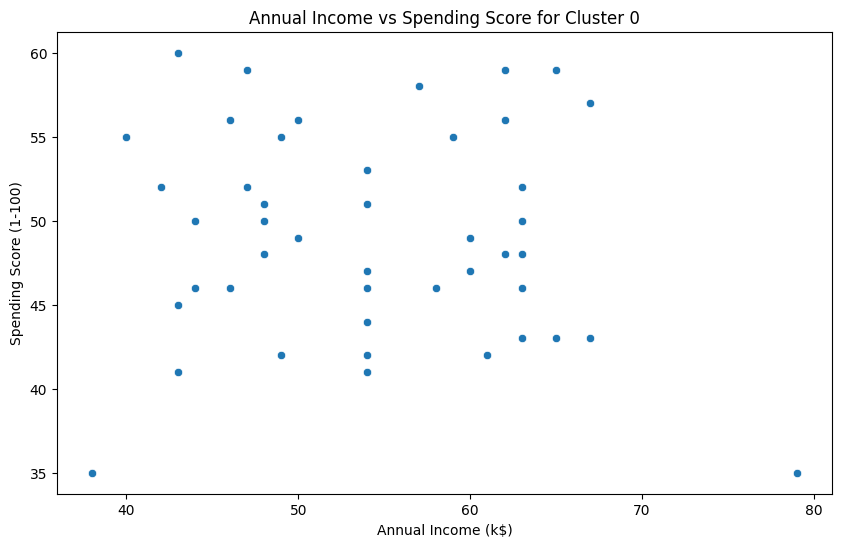

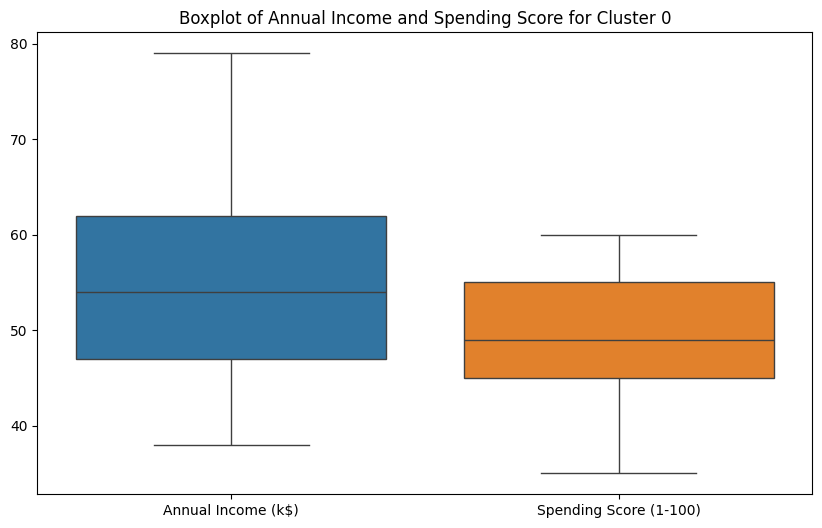

Mean Annual Income for Cluster 0: 54.266666666666666
Median Annual Income for Cluster 0: 54.0
Mean Spending Score for Cluster 0: 49.06666666666667
Median Spending Score for Cluster 0: 49.0


In [53]:
# Filter the data for cluster 0
cluster0 = mall[mall['cluster'] == 0]

# Plot the distribution of Annual Income and Spending Score in cluster 0
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=cluster0)
plt.title('Annual Income vs Spending Score for Cluster 0')
plt.show()

# You can also use a boxplot to visualize the distribution of Annual Income and Spending Score in cluster 0
plt.figure(figsize=(10,6))
sns.boxplot(data=cluster0[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot of Annual Income and Spending Score for Cluster 0')
plt.show()

# To build insights, you can calculate the mean and median of Annual Income and Spending Score in cluster 0
mean_annual_income = cluster0['Annual Income (k$)'].mean()
median_annual_income = cluster0['Annual Income (k$)'].median()
mean_spending_score = cluster0['Spending Score (1-100)'].mean()
median_spending_score = cluster0['Spending Score (1-100)'].median()

print(f'Mean Annual Income for Cluster 0: {mean_annual_income}')
print(f'Median Annual Income for Cluster 0: {median_annual_income}')
print(f'Mean Spending Score for Cluster 0: {mean_spending_score}')
print(f'Median Spending Score for Cluster 0: {median_spending_score}')

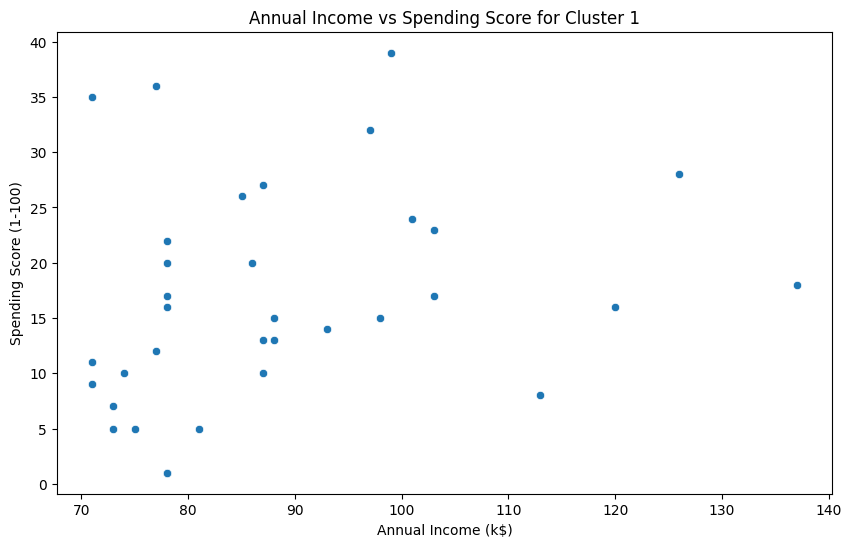

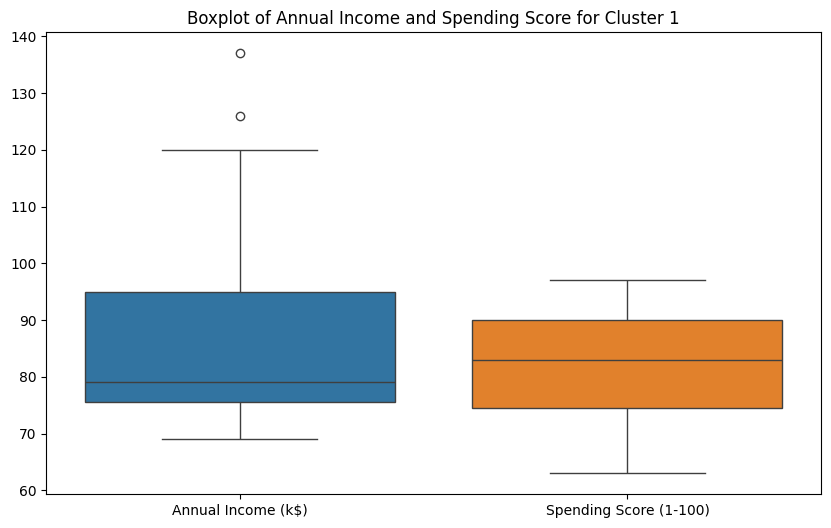

Mean Annual Income for Cluster 1: 86.53846153846153
Median Annual Income for Cluster 1: 79.0
Mean Spending Score for Cluster 1: 82.12820512820512
Median Spending Score for Cluster 1: 83.0


In [47]:
# Filter the data for cluster 1
cluster1 = mall[mall['cluster'] == 1]

# Plot the distribution of Annual Income and Spending Score in cluster 3
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=cluster3)
plt.title('Annual Income vs Spending Score for Cluster 1')
plt.show()

# You can also use a boxplot to visualize the distribution of Annual Income and Spending Score in cluster 1
plt.figure(figsize=(10,6))
sns.boxplot(data=cluster1[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot of Annual Income and Spending Score for Cluster 1')
plt.show()

# To build insights, you can calculate the mean and median of Annual Income and Spending Score in cluster 1
mean_annual_income = cluster1['Annual Income (k$)'].mean()
median_annual_income = cluster1['Annual Income (k$)'].median()
mean_spending_score = cluster1['Spending Score (1-100)'].mean()
median_spending_score = cluster1['Spending Score (1-100)'].median()

print(f'Mean Annual Income for Cluster 1: {mean_annual_income}')
print(f'Median Annual Income for Cluster 1: {median_annual_income}')
print(f'Mean Spending Score for Cluster 1: {mean_spending_score}')
print(f'Median Spending Score for Cluster 1: {median_spending_score}')

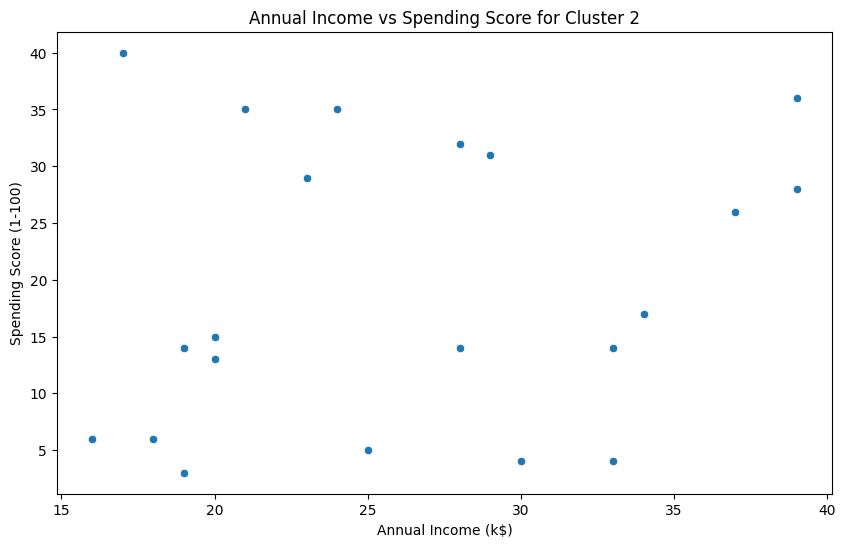

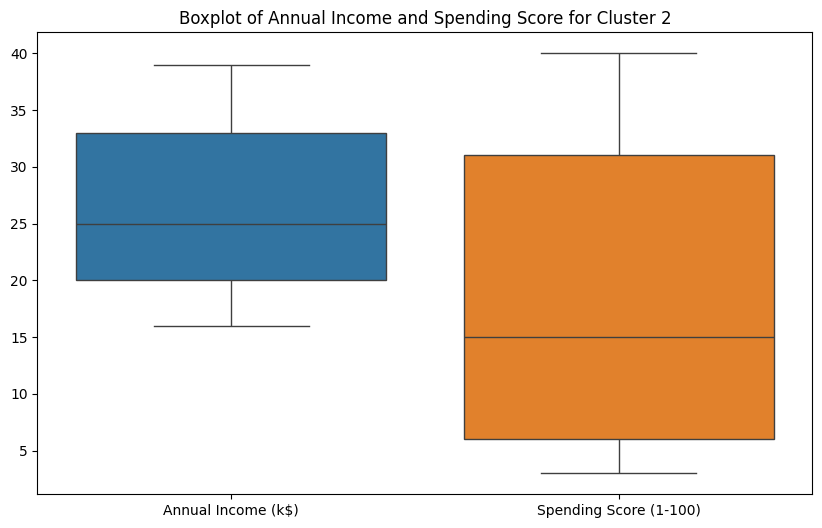

Mean Annual Income for Cluster 2: 26.285714285714285
Median Annual Income for Cluster 2: 25.0
Mean Spending Score for Cluster 2: 19.38095238095238
Median Spending Score for Cluster 2: 15.0


In [48]:
# Filter the data for cluster 2
cluster2 = mall[mall['cluster'] == 2]

# Plot the distribution of Annual Income and Spending Score in cluster 2
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=cluster2)
plt.title('Annual Income vs Spending Score for Cluster 2')
plt.show()

# You can also use a boxplot to visualize the distribution of Annual Income and Spending Score in cluster 2
plt.figure(figsize=(10,6))
sns.boxplot(data=cluster2[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot of Annual Income and Spending Score for Cluster 2')
plt.show()

# To build insights, you can calculate the mean and median of Annual Income and Spending Score in cluster 2
mean_annual_income = cluster2['Annual Income (k$)'].mean()
median_annual_income = cluster2['Annual Income (k$)'].median()
mean_spending_score = cluster2['Spending Score (1-100)'].mean()
median_spending_score = cluster2['Spending Score (1-100)'].median()

print(f'Mean Annual Income for Cluster 2: {mean_annual_income}')
print(f'Median Annual Income for Cluster 2: {median_annual_income}')
print(f'Mean Spending Score for Cluster 2: {mean_spending_score}')
print(f'Median Spending Score for Cluster 2: {median_spending_score}')

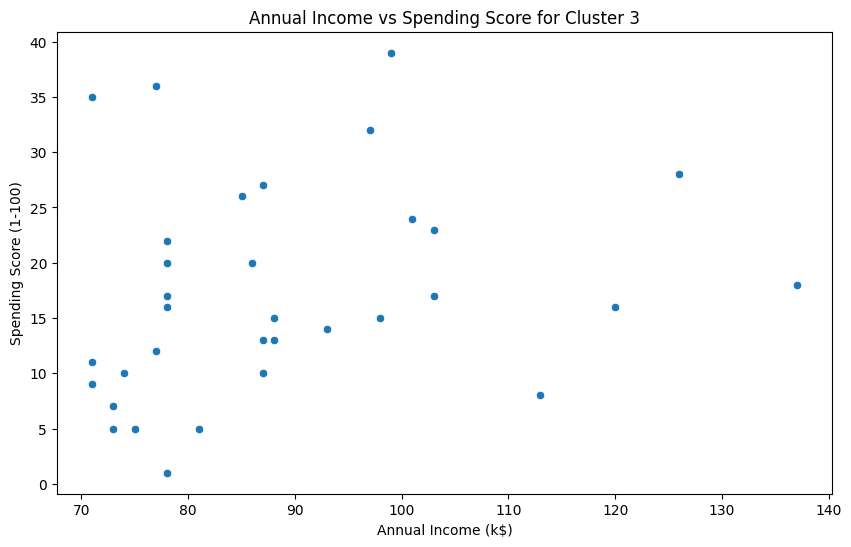

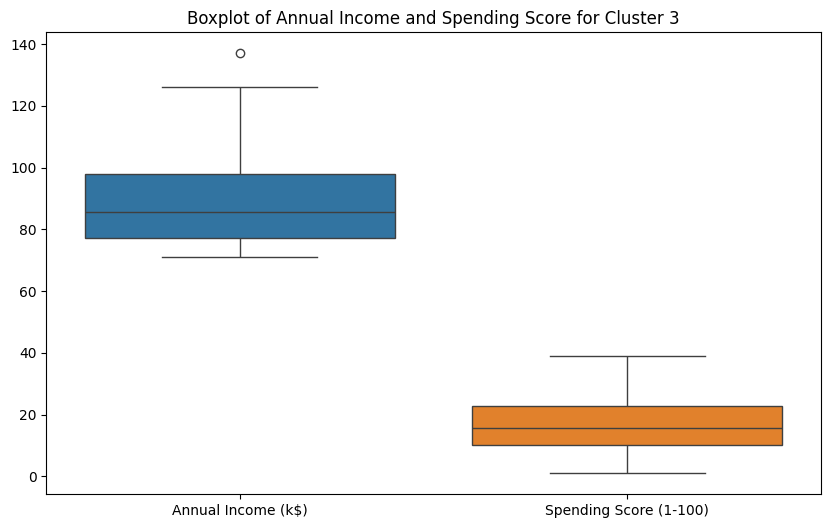

Mean Annual Income for Cluster 3: 88.5
Median Annual Income for Cluster 3: 85.5
Mean Spending Score for Cluster 3: 16.764705882352942
Median Spending Score for Cluster 3: 15.5


In [46]:
# Filter the data for cluster 3
cluster3 = mall[mall['cluster'] == 3]

# Plot the distribution of Annual Income and Spending Score in cluster 3
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=cluster3)
plt.title('Annual Income vs Spending Score for Cluster 3')
plt.show()

# You can also use a boxplot to visualize the distribution of Annual Income and Spending Score in cluster 3
plt.figure(figsize=(10,6))
sns.boxplot(data=cluster3[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot of Annual Income and Spending Score for Cluster 3')
plt.show()

# To build insights, you can calculate the mean and median of Annual Income and Spending Score in cluster 3
mean_annual_income = cluster3['Annual Income (k$)'].mean()
median_annual_income = cluster3['Annual Income (k$)'].median()
mean_spending_score = cluster3['Spending Score (1-100)'].mean()
median_spending_score = cluster3['Spending Score (1-100)'].median()

print(f'Mean Annual Income for Cluster 3: {mean_annual_income}')
print(f'Median Annual Income for Cluster 3: {median_annual_income}')
print(f'Mean Spending Score for Cluster 3: {mean_spending_score}')
print(f'Median Spending Score for Cluster 3: {median_spending_score}')

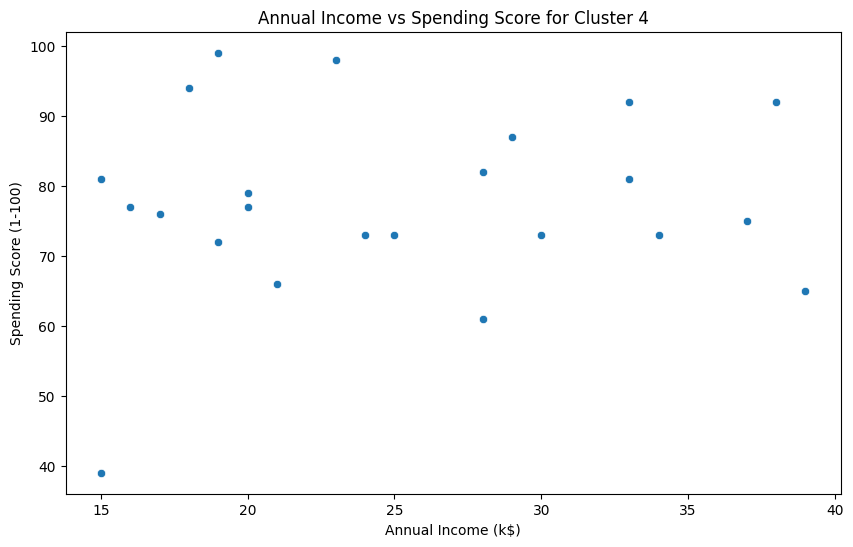

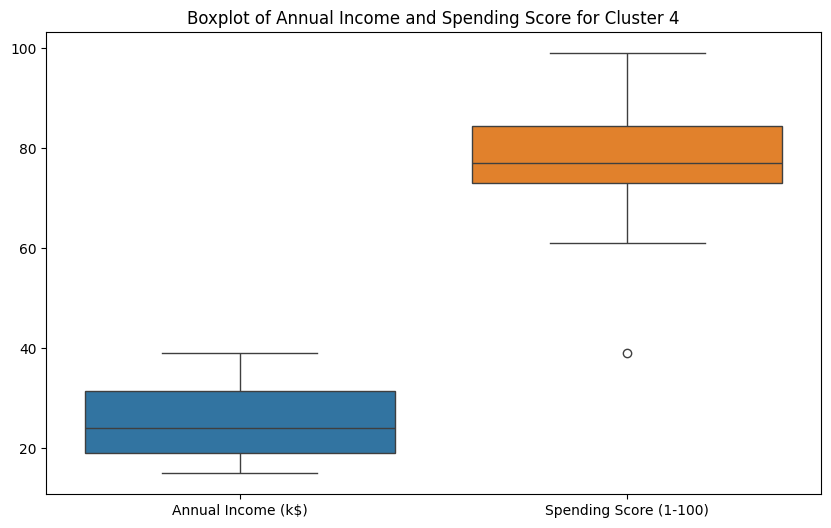

Mean Annual Income for Cluster 4: 25.26086956521739
Median Annual Income for Cluster 4: 24.0
Mean Spending Score for Cluster 4: 77.6086956521739
Median Spending Score for Cluster 4: 77.0


In [49]:
# Filter the data for cluster 4
cluster4 = mall[mall['cluster'] == 4]

# Plot the distribution of Annual Income and Spending Score in cluster 4
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=cluster4)
plt.title('Annual Income vs Spending Score for Cluster 4')
plt.show()

# You can also use a boxplot to visualize the distribution of Annual Income and Spending Score in cluster 4
plt.figure(figsize=(10,6))
sns.boxplot(data=cluster4[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot of Annual Income and Spending Score for Cluster 4')
plt.show()

# To build insights, you can calculate the mean and median of Annual Income and Spending Score in cluster 4
mean_annual_income = cluster4['Annual Income (k$)'].mean()
median_annual_income = cluster4['Annual Income (k$)'].median()
mean_spending_score = cluster4['Spending Score (1-100)'].mean()
median_spending_score = cluster4['Spending Score (1-100)'].median()

print(f'Mean Annual Income for Cluster 4: {mean_annual_income}')
print(f'Median Annual Income for Cluster 4: {median_annual_income}')
print(f'Mean Spending Score for Cluster 4: {mean_spending_score}')
print(f'Median Spending Score for Cluster 4: {median_spending_score}')

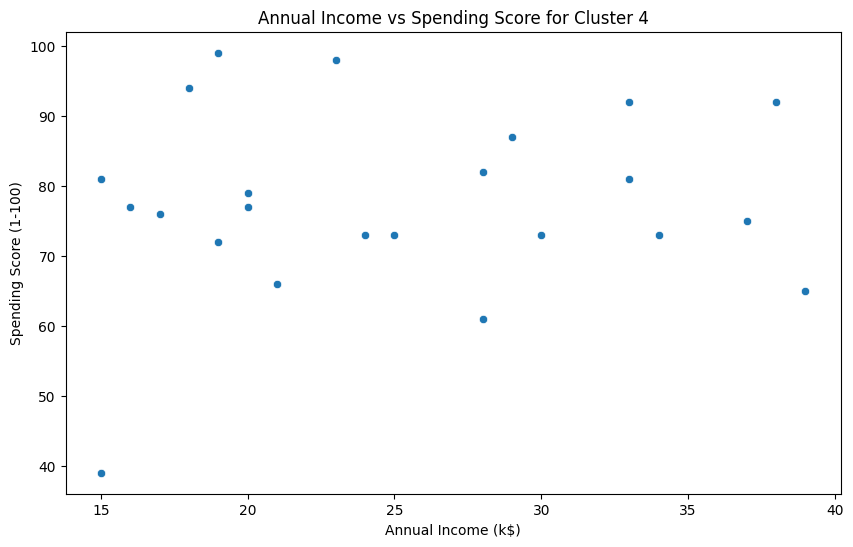

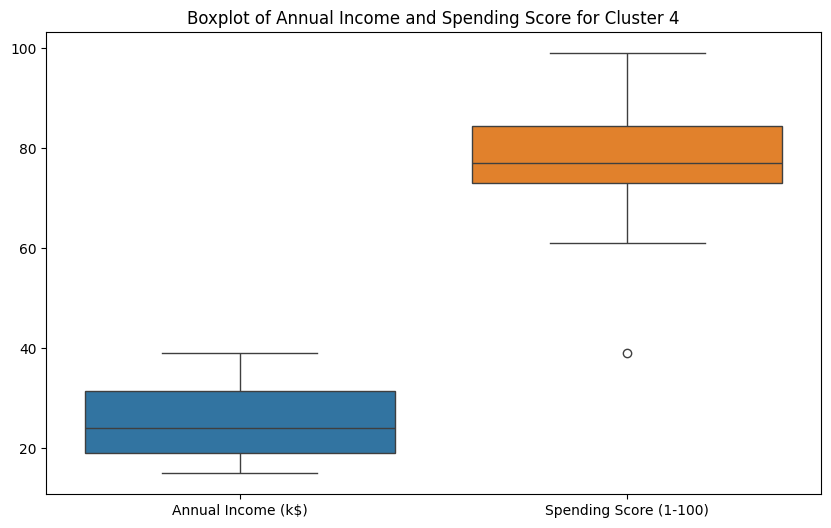

Mean Annual Income for Cluster 4: 25.26086956521739
Median Annual Income for Cluster 4: 24.0
Mean Spending Score for Cluster 4: 77.6086956521739
Median Spending Score for Cluster 4: 77.0


In [50]:
# Filter the data for cluster 4
cluster4 = mall[mall['cluster'] == 4]

# Plot the distribution of Annual Income and Spending Score in cluster 4
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=cluster4)
plt.title('Annual Income vs Spending Score for Cluster 4')
plt.show()

# You can also use a boxplot to visualize the distribution of Annual Income and Spending Score in cluster 4
plt.figure(figsize=(10,6))
sns.boxplot(data=cluster4[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot of Annual Income and Spending Score for Cluster 4')
plt.show()

# To build insights, you can calculate the mean and median of Annual Income and Spending Score in cluster 4
mean_annual_income = cluster4['Annual Income (k$)'].mean()
median_annual_income = cluster4['Annual Income (k$)'].median()
mean_spending_score = cluster4['Spending Score (1-100)'].mean()
median_spending_score = cluster4['Spending Score (1-100)'].median()

print(f'Mean Annual Income for Cluster 4: {mean_annual_income}')
print(f'Median Annual Income for Cluster 4: {median_annual_income}')
print(f'Mean Spending Score for Cluster 4: {mean_spending_score}')
print(f'Median Spending Score for Cluster 4: {median_spending_score}')

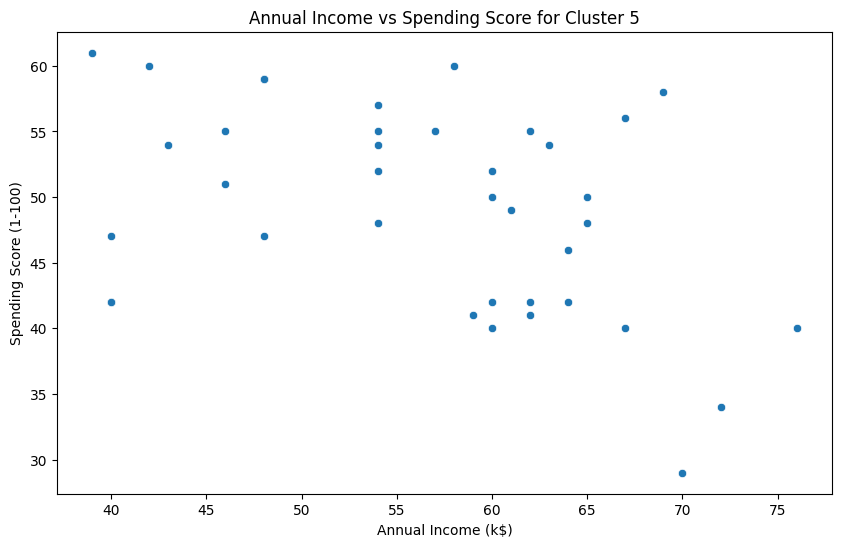

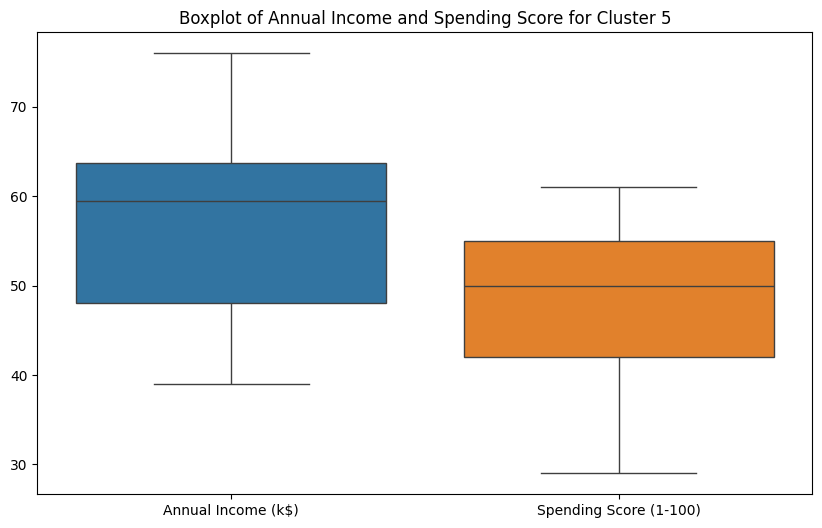

Mean Annual Income for Cluster 5: 56.6578947368421
Median Annual Income for Cluster 5: 59.5
Mean Spending Score for Cluster 5: 49.13157894736842
Median Spending Score for Cluster 5: 50.0


In [51]:
# Filter the data for cluster 5
cluster5 = mall[mall['cluster'] == 5]

# Plot the distribution of Annual Income and Spending Score in cluster 5
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=cluster5)
plt.title('Annual Income vs Spending Score for Cluster 5')
plt.show()

# You can also use a boxplot to visualize the distribution of Annual Income and Spending Score in cluster 5
plt.figure(figsize=(10,6))
sns.boxplot(data=cluster5[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot of Annual Income and Spending Score for Cluster 5')
plt.show()

# To build insights, you can calculate the mean and median of Annual Income and Spending Score in cluster 5
mean_annual_income = cluster5['Annual Income (k$)'].mean()
median_annual_income = cluster5['Annual Income (k$)'].median()
mean_spending_score = cluster5['Spending Score (1-100)'].mean()
median_spending_score = cluster5['Spending Score (1-100)'].median()

print(f'Mean Annual Income for Cluster 5: {mean_annual_income}')
print(f'Median Annual Income for Cluster 5: {median_annual_income}')
print(f'Mean Spending Score for Cluster 5: {mean_spending_score}')
print(f'Median Spending Score for Cluster 5: {median_spending_score}')

In [52]:
mall.cluster.value_counts()

cluster
0    45
1    39
5    38
3    34
4    23
2    21
Name: count, dtype: int64

In [ ]:
maall = mall.values
# Plotting the clusters and their centroids
plt.figure(figsize=(8, 8))
plt.scatter(maall[cluster == 0, 0], maall[cluster == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(maall[cluster == 1, 0], maall[cluster == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(maall[cluster == 2, 0], maall[cluster == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(maall[cluster == 3, 0], maall[cluster == 3, 1], s=50, c='pink', label='Cluster 4')
plt.scatter(maall[cluster == 4, 0], maall[cluster == 4, 1], s=50, c='yellow', label='Cluster 5')


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='black', label='Centroids')

plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Store')
plt.legend()
plt.show()